In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5359.5/8062.4 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="peAtdpeJN9JbTS3jM8EV")
project = rf.workspace("pidray-8gl3p").project("pidray-bbmo7")
dataset = project.version(2).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.1, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to PIDRAY-2 in yolov8:: 100%|██████████| 20132/20132 [00:02<00:00, 7844.40it/s] 


In [3]:
yolo8_model_detection =YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 72.7MB/s]


In [7]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/PIDRAY-2 datasets/sixray100-1

In [ ]:
yolo8_model_detection.train(data='/kaggle/working/datasets/sixray100-1/data.yaml', epochs= 120, imgsz=640, batch=64,project='YOLO_weights',name='SIXray_Output',exist_ok=True)

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/datasets/sixray100-1/data.yaml, epochs=120, time=None, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]
2024-01-13 18:55:08,547	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-13 18:55:09,042	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-2/train/labels... 7820 images, 1337 backgrounds, 0 corrupt: 100%|██████████| 7820/7820 [00:06<00:00, 1295.33it/s]


train: New cache created: /kaggle/working/datasets/sixray100-1/PIDRAY-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-2/valid/labels... 1537 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:01<00:00, 1217.26it/s]

val: New cache created: /kaggle/working/datasets/sixray100-1/PIDRAY-2/valid/labels.cache


Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      8.13G      1.534      4.299      1.588         35        640: 100%|██████████| 123/123 [01:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.19it/s]


                   all       1537       1627      0.454      0.149      0.116     0.0765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      8.12G      1.418      3.112      1.471         24        640: 100%|██████████| 123/123 [01:30<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.49it/s]


                   all       1537       1627      0.362      0.277      0.212      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      8.13G      1.491      2.696      1.521         31        640: 100%|██████████| 123/123 [01:31<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.53it/s]


                   all       1537       1627      0.836      0.111      0.115     0.0608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      8.11G      1.585       2.38      1.605         25        640: 100%|██████████| 123/123 [01:31<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.54it/s]


                   all       1537       1627       0.56      0.114      0.138     0.0674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      8.09G      1.503      2.019      1.559         27        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.49it/s]


                   all       1537       1627      0.261      0.263      0.239      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      8.06G      1.447       1.85      1.502         19        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.52it/s]

                   all       1537       1627      0.447      0.289      0.279      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      8.08G      1.379      1.685      1.453         33        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all       1537       1627      0.538      0.389      0.415      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      8.08G      1.328      1.608       1.43         21        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.53it/s]

                   all       1537       1627      0.496      0.264      0.283       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      8.11G      1.297      1.517      1.396         26        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]


                   all       1537       1627      0.545      0.465      0.456      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120       8.1G      1.268      1.467      1.379         26        640: 100%|██████████| 123/123 [01:31<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all       1537       1627      0.636      0.407      0.456      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      8.08G      1.252      1.424      1.372         21        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.53it/s]

                   all       1537       1627      0.626      0.421      0.479      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      8.08G      1.225      1.362      1.345         28        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

                   all       1537       1627      0.553      0.382      0.387      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      8.09G      1.203      1.311      1.332         34        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all       1537       1627      0.617      0.416      0.453      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      8.34G      1.185       1.29      1.316         21        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.53it/s]

                   all       1537       1627       0.67      0.452      0.504      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      8.11G       1.16      1.252        1.3         19        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all       1537       1627       0.57      0.487      0.474      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      8.08G      1.154      1.225      1.295         26        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all       1537       1627      0.721      0.469      0.558      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      8.09G      1.116      1.179      1.272         19        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all       1537       1627      0.655      0.392      0.482      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      8.11G      1.125      1.169      1.279         22        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all       1537       1627      0.655      0.474      0.481       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      8.08G      1.105      1.147      1.262         25        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

                   all       1537       1627      0.709      0.438      0.487       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      8.08G        1.1      1.129      1.256         21        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.46it/s]

                   all       1537       1627      0.741      0.502      0.526      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      8.07G      1.097      1.114      1.258         22        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all       1537       1627      0.821      0.463      0.521      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      8.08G      1.072      1.086      1.238         29        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all       1537       1627      0.757      0.516      0.542      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      8.09G      1.068      1.085      1.237         26        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.54it/s]

                   all       1537       1627      0.834      0.453      0.552      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      8.06G      1.051       1.06      1.228         33        640: 100%|██████████| 123/123 [01:30<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.54it/s]

                   all       1537       1627      0.728      0.504      0.489      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      8.08G      1.053      1.045      1.231         22        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all       1537       1627      0.704      0.508      0.566      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      8.09G      1.043      1.039      1.223         29        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all       1537       1627      0.693      0.497      0.505      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      8.06G      1.047      1.041      1.223         28        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all       1537       1627      0.727      0.571      0.557      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      8.09G      1.028      1.013      1.213         21        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.49it/s]

                   all       1537       1627      0.845        0.5      0.575      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      8.09G      1.007     0.9768      1.192         24        640: 100%|██████████| 123/123 [01:30<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.61it/s]

                   all       1537       1627      0.598      0.494      0.497      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      8.11G      1.012     0.9812      1.201         12        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all       1537       1627      0.781      0.585      0.605      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      8.09G      1.005     0.9748      1.195         23        640: 100%|██████████| 123/123 [01:28<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all       1537       1627      0.773      0.522      0.572      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      8.08G     0.9971     0.9671      1.189         18        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all       1537       1627      0.778      0.567      0.598      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      8.07G     0.9958     0.9567       1.18         27        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.62it/s]

                   all       1537       1627      0.784      0.528      0.571      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      8.06G     0.9705     0.9207      1.179         24        640: 100%|██████████| 123/123 [01:30<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all       1537       1627      0.817       0.55      0.633      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      8.09G     0.9775     0.9363      1.179         27        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all       1537       1627       0.79      0.553      0.606      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      8.11G     0.9751     0.9247      1.173         21        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.54it/s]

                   all       1537       1627      0.826      0.517      0.574      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      8.08G     0.9612      0.906      1.167         18        640: 100%|██████████| 123/123 [01:28<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all       1537       1627      0.838      0.554      0.613      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      8.06G     0.9553     0.9047      1.168         26        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all       1537       1627      0.768      0.598      0.636      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      8.11G     0.9617     0.9021      1.167         23        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all       1537       1627      0.875      0.581      0.658      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      8.07G     0.9457     0.8752      1.159         14        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all       1537       1627       0.84      0.516      0.567      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      8.08G     0.9463     0.8818      1.155         25        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.61it/s]

                   all       1537       1627      0.803      0.616      0.639      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      8.08G     0.9441     0.8744      1.156         27        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all       1537       1627      0.837      0.579      0.644      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      8.06G     0.9419     0.8747      1.158         18        640: 100%|██████████| 123/123 [01:28<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.54it/s]

                   all       1537       1627      0.668      0.656      0.615      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      8.08G      0.927     0.8576      1.144         15        640: 100%|██████████| 123/123 [01:28<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.52it/s]

                   all       1537       1627      0.924       0.53       0.62      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      8.06G     0.9207     0.8487      1.145         15        640: 100%|██████████| 123/123 [01:28<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.49it/s]

                   all       1537       1627      0.757      0.555      0.596      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      8.09G     0.9175     0.8428      1.135         20        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all       1537       1627      0.773      0.597      0.626      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      8.06G     0.9112     0.8377      1.135         26        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all       1537       1627      0.757      0.613      0.651      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      8.08G     0.9121     0.8275      1.136         29        640: 100%|██████████| 123/123 [01:30<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]

                   all       1537       1627      0.858      0.565      0.655      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120       8.5G     0.8992     0.8133      1.131         20        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all       1537       1627      0.811      0.586      0.658      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      8.08G     0.9019     0.8209      1.132         26        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all       1537       1627      0.838      0.624      0.668      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      8.09G     0.8965      0.806      1.122         27        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all       1537       1627      0.738      0.575      0.649      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      8.08G      0.893     0.8159      1.122         15        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all       1537       1627      0.808      0.602      0.641      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      8.09G     0.8822     0.7921      1.117         24        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all       1537       1627      0.811      0.599      0.628      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      8.09G     0.8817     0.7892      1.117         19        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all       1537       1627       0.86      0.583      0.661      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      8.08G     0.8782     0.7962      1.114         26        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all       1537       1627      0.829      0.655       0.67      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      8.06G     0.8763     0.7914      1.114         29        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.62it/s]

                   all       1537       1627      0.897      0.585      0.669      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      8.06G     0.8719      0.772      1.112         20        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all       1537       1627      0.832      0.607      0.671      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      8.09G     0.8702     0.7731      1.114         26        640: 100%|██████████| 123/123 [01:28<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all       1537       1627      0.862       0.61      0.666      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      8.06G     0.8594     0.7717      1.103         22        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.61it/s]

                   all       1537       1627      0.886      0.594      0.692      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      8.08G     0.8576     0.7576        1.1         16        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.63it/s]

                   all       1537       1627      0.874      0.614      0.682      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      8.08G     0.8609     0.7645        1.1         28        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all       1537       1627       0.81      0.618      0.683      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      8.08G     0.8514     0.7519      1.098         24        640: 100%|██████████| 123/123 [01:28<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.52it/s]

                   all       1537       1627      0.832      0.624      0.688      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      8.09G     0.8458     0.7353      1.097         28        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all       1537       1627      0.756      0.641      0.673      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      8.09G      0.838     0.7408      1.093         39        640: 100%|██████████| 123/123 [01:30<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all       1537       1627      0.919      0.602      0.672      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      8.08G     0.8439     0.7405      1.095         20        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.61it/s]

                   all       1537       1627      0.921      0.613      0.696      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      8.08G     0.8376     0.7333      1.088         28        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]

                   all       1537       1627      0.915      0.616      0.689      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      8.08G     0.8395     0.7338      1.089         22        640: 100%|██████████| 123/123 [01:30<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.61it/s]

                   all       1537       1627      0.931      0.601      0.669      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      8.09G     0.8328     0.7197      1.082         26        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all       1537       1627      0.879      0.627      0.681      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      8.08G     0.8255      0.711      1.081         13        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all       1537       1627      0.826      0.641      0.657      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      8.09G     0.8256      0.716      1.083         26        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all       1537       1627      0.894      0.615      0.661      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      8.09G     0.8254     0.7151      1.083         21        640: 100%|██████████| 123/123 [01:28<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all       1537       1627      0.883      0.626      0.672      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      8.09G      0.813     0.6925      1.074         27        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all       1537       1627      0.872       0.62      0.664      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      8.06G     0.8117     0.6986      1.074         21        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.62it/s]

                   all       1537       1627      0.869      0.597      0.665      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      8.09G     0.8072     0.6915      1.072         26        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.63it/s]

                   all       1537       1627      0.864      0.607      0.675      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      8.08G     0.8084     0.6883      1.073         22        640: 100%|██████████| 123/123 [01:28<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.62it/s]

                   all       1537       1627      0.902      0.602      0.669      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      8.08G     0.8047     0.6799      1.069         21        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all       1537       1627      0.903      0.584      0.676      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      8.08G     0.7999      0.679       1.07         20        640: 100%|██████████| 123/123 [01:33<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all       1537       1627      0.866      0.613      0.673      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      8.07G     0.7984      0.673      1.064         24        640: 100%|██████████| 123/123 [01:28<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all       1537       1627      0.867      0.633      0.678      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      8.08G     0.7936      0.666      1.062         25        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.49it/s]

                   all       1537       1627      0.881      0.605      0.678      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      8.08G     0.7884     0.6623      1.061         27        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all       1537       1627      0.865      0.648      0.702      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      8.07G      0.777     0.6537      1.055         23        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.66it/s]

                   all       1537       1627      0.882      0.618      0.673      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      8.08G     0.7923       0.67       1.06         20        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all       1537       1627      0.868      0.652      0.707      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      8.11G     0.7793     0.6475      1.053         30        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all       1537       1627      0.842      0.663       0.71      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      8.06G     0.7724     0.6493      1.046         29        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all       1537       1627      0.879      0.669      0.703      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      8.11G      0.766     0.6397      1.046         33        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]

                   all       1537       1627        0.9      0.654      0.714      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      8.08G      0.766     0.6412      1.052         22        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.61it/s]

                   all       1537       1627       0.89       0.64      0.714      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      8.08G      0.763     0.6386      1.047         18        640: 100%|██████████| 123/123 [01:28<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all       1537       1627      0.875      0.646      0.705      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      8.09G     0.7649     0.6343      1.047         26        640: 100%|██████████| 123/123 [01:28<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

                   all       1537       1627      0.775      0.644        0.7      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      8.09G     0.7537     0.6347      1.045         32        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all       1537       1627      0.915      0.624      0.707      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      8.07G     0.7592     0.6362      1.043         28        640: 100%|██████████| 123/123 [01:30<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all       1537       1627      0.761      0.688       0.71       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      8.09G      0.749     0.6211      1.036         25        640: 100%|██████████| 123/123 [01:28<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all       1537       1627      0.919      0.614      0.714      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      8.11G      0.749     0.6176      1.038         27        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.62it/s]

                   all       1537       1627      0.927      0.612      0.708       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      8.08G     0.7466     0.6106      1.035         20        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all       1537       1627      0.918      0.626      0.713      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      8.09G      0.735     0.6082      1.036         21        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.64it/s]

                   all       1537       1627      0.921       0.62      0.713      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      8.09G     0.7361     0.6079      1.031         33        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.52it/s]

                   all       1537       1627      0.836      0.671      0.706      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      8.09G     0.7245      0.588      1.024         22        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all       1537       1627      0.828       0.69      0.721      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      8.09G     0.7226     0.5881      1.025         29        640: 100%|██████████| 123/123 [01:29<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.62it/s]

                   all       1537       1627       0.86       0.69      0.723      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      8.08G     0.7197     0.5952       1.02         25        640: 100%|██████████| 123/123 [01:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.49it/s]

                   all       1537       1627      0.821      0.691      0.726      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      8.11G     0.7085     0.5849      1.021         22        640: 100%|██████████| 123/123 [01:28<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.48it/s]

                   all       1537       1627      0.899      0.657      0.722      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      8.09G     0.6999     0.5679      1.016         24        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all       1537       1627      0.859       0.67      0.721      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      8.11G     0.6983     0.5671      1.009         18        640: 100%|██████████| 123/123 [01:30<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.61it/s]

                   all       1537       1627      0.864      0.678      0.718      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      8.11G     0.7039     0.5748      1.012         25        640: 100%|██████████| 123/123 [01:30<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all       1537       1627      0.854      0.666      0.715      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      8.11G     0.6931      0.564      1.013         26        640: 100%|██████████| 123/123 [01:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all       1537       1627      0.852      0.671       0.71      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      8.06G     0.6891     0.5532      1.007         23        640: 100%|██████████| 123/123 [01:30<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all       1537       1627      0.863      0.671       0.71      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      8.06G     0.5728     0.4109     0.9425         15        640: 100%|██████████| 123/123 [01:26<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.62it/s]

                   all       1537       1627      0.846      0.682      0.711      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      8.06G     0.5648     0.3976     0.9388         12        640: 100%|██████████| 123/123 [01:24<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]

                   all       1537       1627      0.882      0.642      0.707        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      8.08G     0.5545     0.3846     0.9285         10        640: 100%|██████████| 123/123 [01:23<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]

                   all       1537       1627      0.839      0.663       0.71      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      8.06G     0.5481     0.3805     0.9269         13        640: 100%|██████████| 123/123 [01:24<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.64it/s]

                   all       1537       1627      0.848      0.673      0.713      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      8.08G     0.5493     0.3807     0.9297         12        640: 100%|██████████| 123/123 [01:23<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.64it/s]

                   all       1537       1627      0.862      0.665      0.711      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      8.06G     0.5393     0.3737       0.92         11        640: 100%|██████████| 123/123 [01:23<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.61it/s]

                   all       1537       1627      0.863      0.666      0.712      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      8.06G     0.5368     0.3719     0.9227         16        640: 100%|██████████| 123/123 [01:23<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]

                   all       1537       1627      0.865      0.666      0.714      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      8.03G     0.5346     0.3701     0.9199         16        640: 100%|██████████| 123/123 [01:23<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.66it/s]

                   all       1537       1627      0.865      0.671      0.711      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      8.08G     0.5281     0.3637     0.9183         16        640: 100%|██████████| 123/123 [01:22<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.54it/s]

                   all       1537       1627      0.867      0.671      0.712      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      8.06G     0.5313     0.3668     0.9214         70        640:  53%|█████▎    | 65/123 [00:45<00:44,  1.29it/s]

In [14]:
# Load a model
#model = YOLO('path/to/best.pt')  # load a custom model
# Validate the model
metrics = yolo8_model_detection.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-2/valid/labels.cache... 1537 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:12<00:00,  7.64it/s]


                   all       1537       1627       0.82      0.677      0.705      0.596
                 Baton       1537          4          1          0          0          0
                Bullet       1537          9      0.358      0.191      0.158     0.0916
                   Gun       1537         17      0.558      0.765      0.654      0.575
                Hammer       1537        960      0.996      0.882       0.99      0.927
             HandCuffs       1537         13       0.92      0.769      0.854      0.716
                 Knife       1537         13      0.907      0.752      0.815      0.716
               Lighter       1537         16       0.58      0.688      0.652      0.527
                Pliers       1537        375      0.977       0.92       0.98      0.862
             Powerbank       1537         49      0.939      0.947       0.99      0.781
              Scissors       1537        171      0.969      0.854      0.959      0.769
Speed: 0.3ms preproce

array([          0,    0.091596,     0.57465,     0.92692,     0.71649,     0.71571,     0.52699,     0.86177,     0.78084,     0.76884])

image 372/703 /kaggle/working/datasets/sixray100-1/test/images/xray_24469_png.rf.6bd510c344e8901a21ee321cc9616263.jpg: 640x608 1 Scissors, 6.9ms
image 373/703 /kaggle/working/datasets/sixray100-1/test/images/xray_24470_png.rf.3996d669cb1c66472369ce7f6398c7b3.jpg: 640x480 1 Scissors, 6.5ms
image 374/703 /kaggle/working/datasets/sixray100-1/test/images/xray_24471_png.rf.5292372bf385b7bfc6551b9829f33ba2.jpg: 640x512 1 Scissors, 7.4ms
image 375/703 /kaggle/working/datasets/sixray100-1/test/images/xray_24472_png.rf.6b349a47a8f2bd5027c4fdc3fed7c533.jpg: 640x416 1 Scissors, 6.6ms
image 376/703 /kaggle/working/datasets/sixray100-1/test/images/xray_24473_png.rf.9fc564d3f51abf140a5bb3c17e27720f.jpg: 640x352 3 Scissorss, 6.5ms
image 377/703 /kaggle/working/datasets/sixray100-1/test/images/xray_24474_png.rf.6e3abf3414f25bb30f4a9cec844914ad.jpg: 640x512 1 Scissors, 6.5ms
image 378/703 /kaggle/working/datasets/sixray100-1/test/images/xray_24475_png.rf.b49584ef74b7d069861a2b879eb865b5.jpg: 640x608 1 

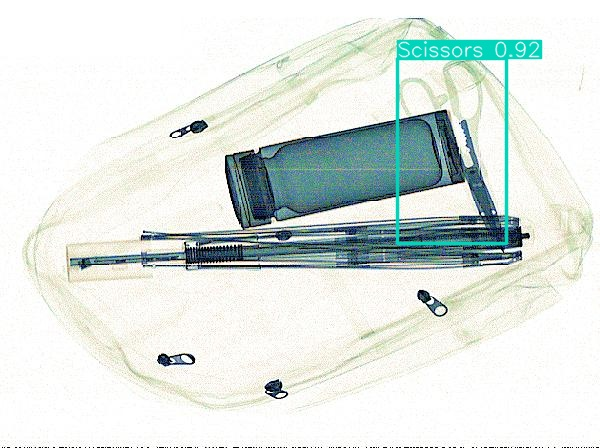

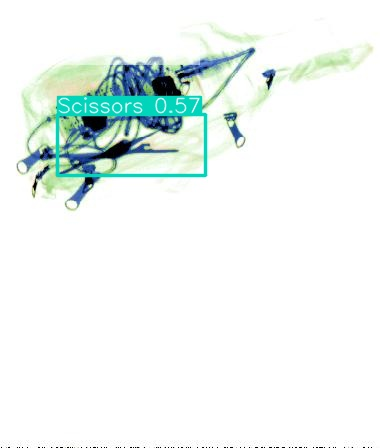

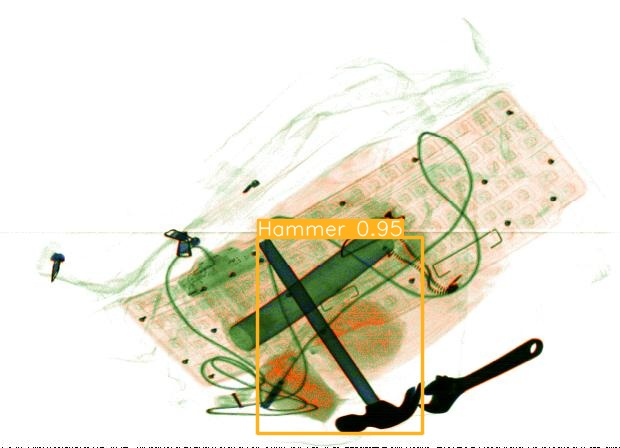

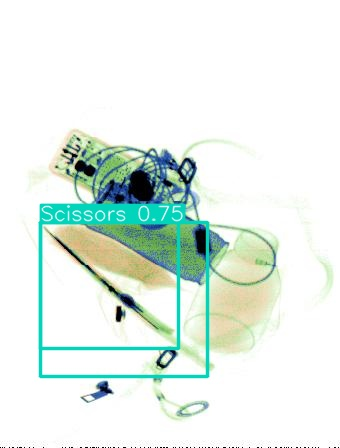

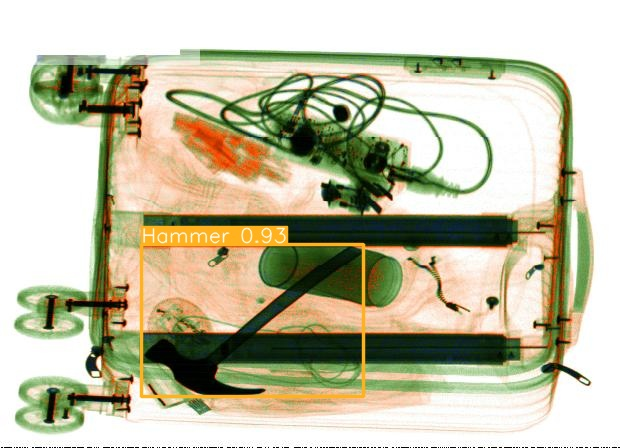

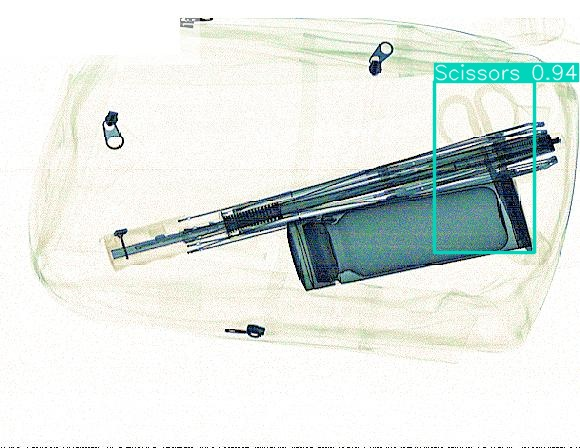

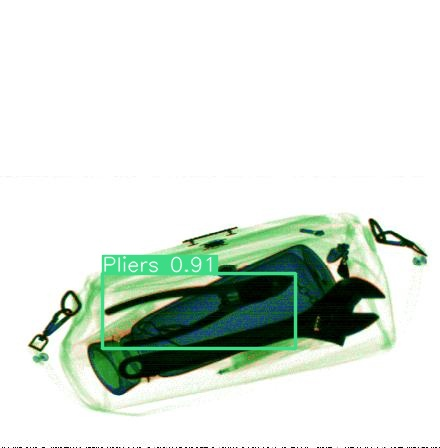

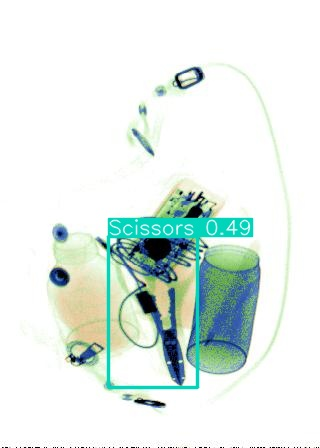

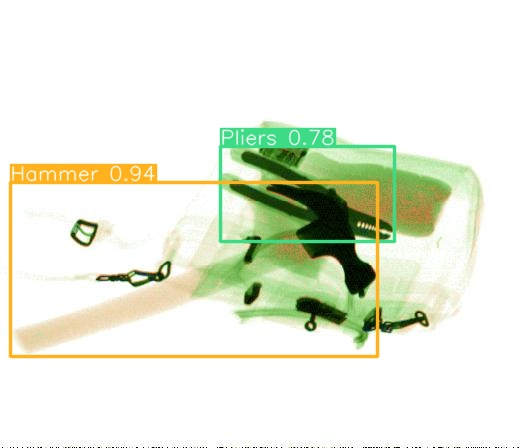

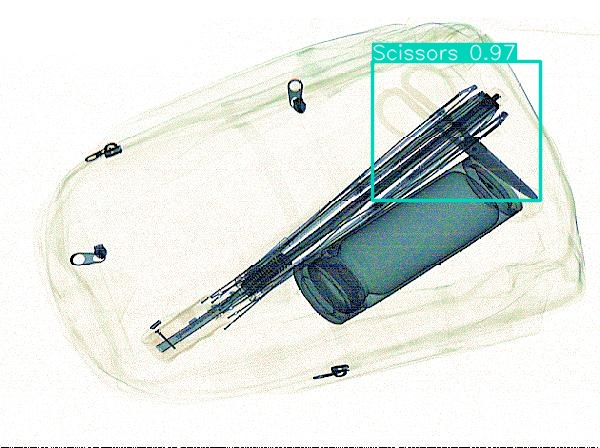

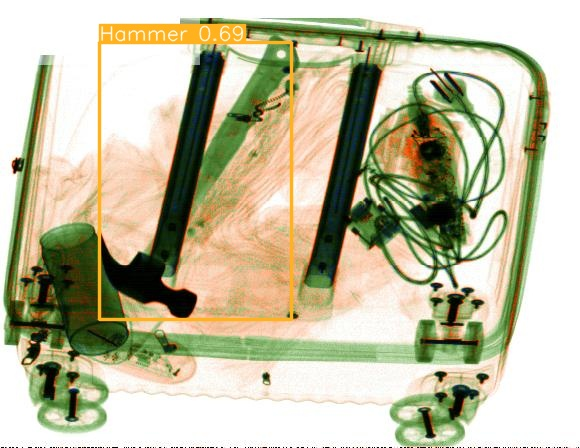

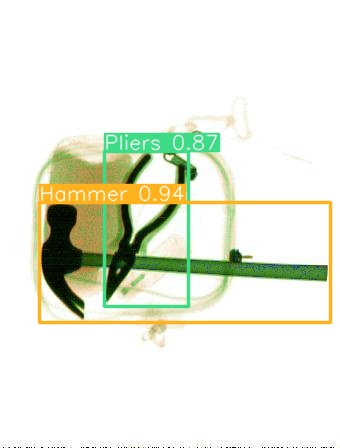

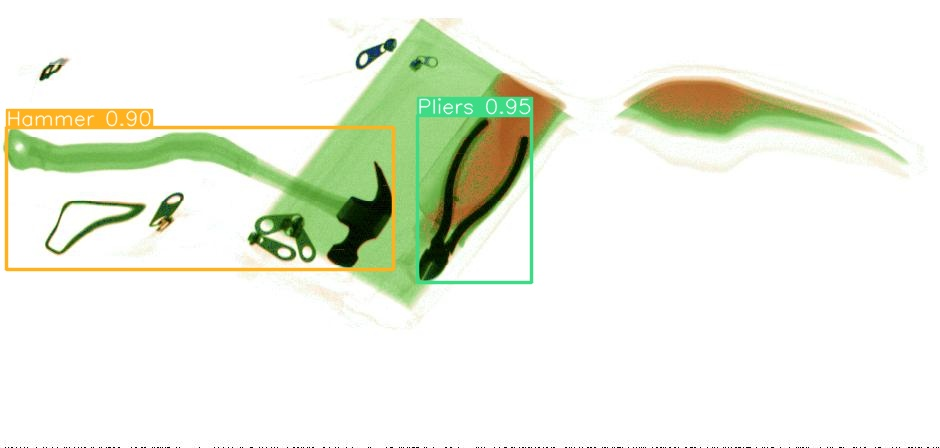

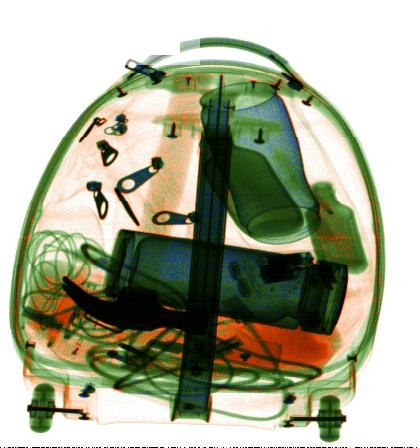

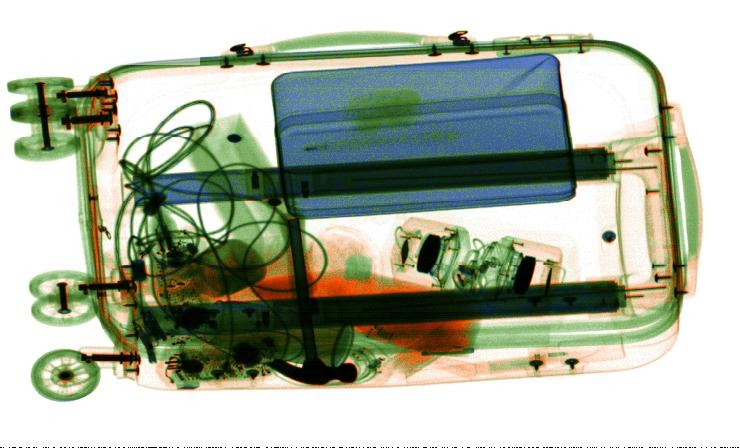

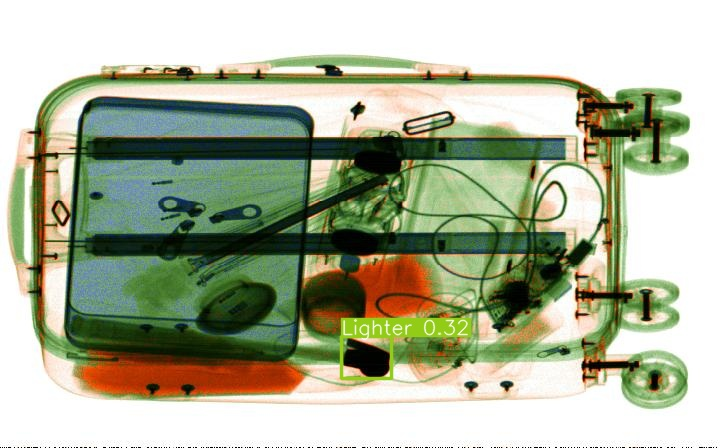

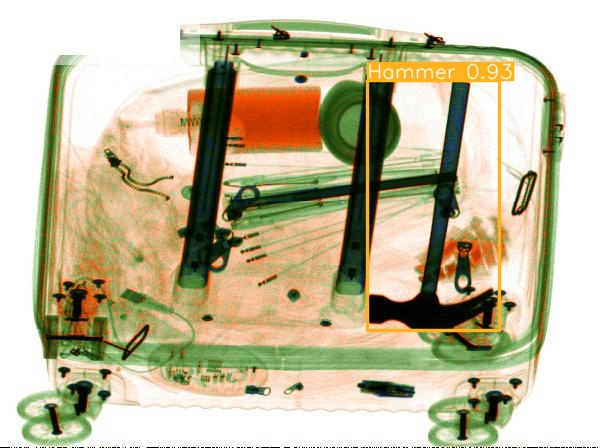

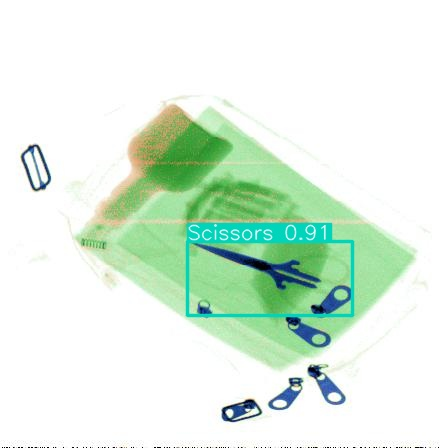

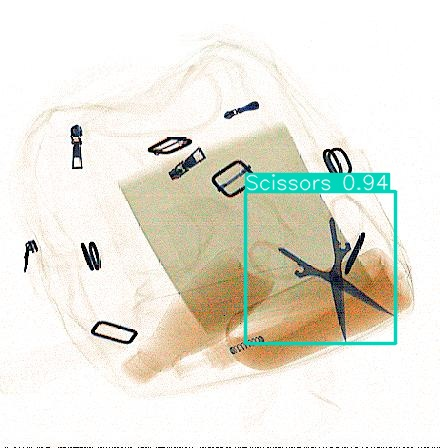

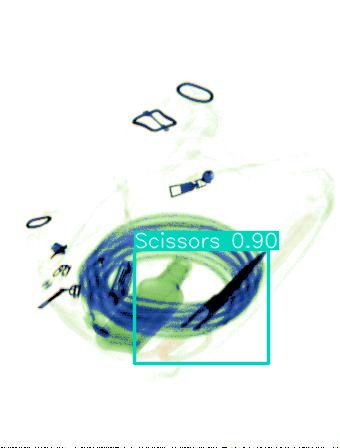

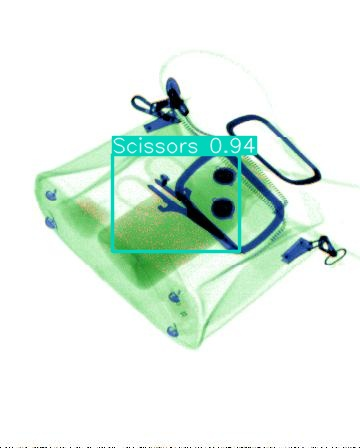

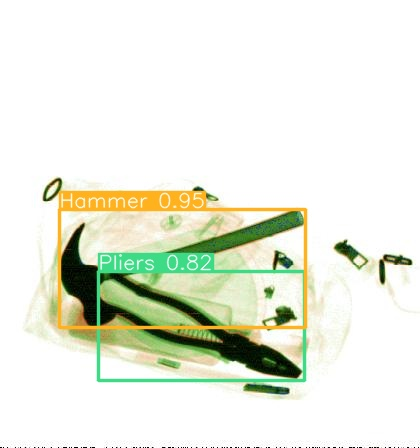

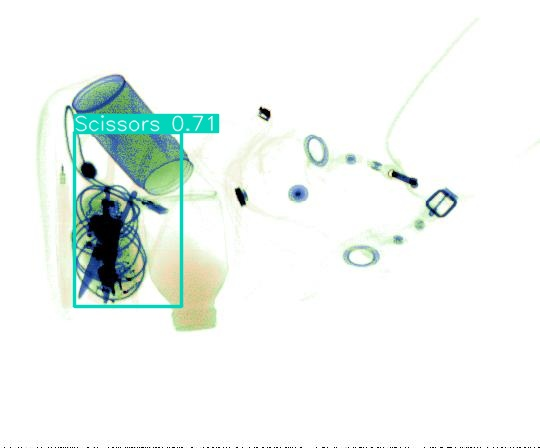

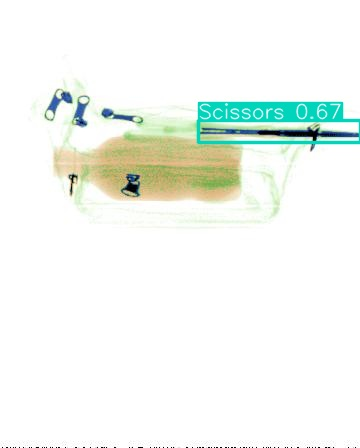

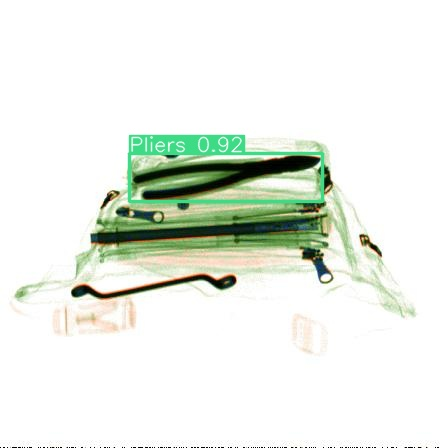

In [10]:
yolo8_model_detection=YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/datasets/sixray100-1/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

In [15]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)

Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5362.9/8062.4 GB disk)

Benchmarks complete for best.pt on /kaggle/working/datasets/sixray100-1/data.yaml at imgsz=640 (651.06s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        5.9               0.5936                    9.84
1             TorchScript       ✅       11.9               0.6006                    4.63
2                    ONNX       ✅       11.7               0.6006                    9.54
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❎       15.3                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ✅       29.3               0.6006                   17.50
7     TensorFlow GraphDef       ✅       11.7               0.6006                   14.34
8         TensorFlow L

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im)
0,PyTorch,✅,5.9,0.5936,9.84
1,TorchScript,✅,11.9,0.6006,4.63
2,ONNX,✅,11.7,0.6006,9.54
3,OpenVINO,❌,0.0,NaN,NaN
4,TensorRT,❎,15.3,NaN,NaN
5,CoreML,❌,0.0,NaN,NaN
6,TensorFlow SavedModel,✅,29.3,0.6006,17.50
7,TensorFlow GraphDef,✅,11.7,0.6006,14.34
8,TensorFlow Lite,❌,0.0,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN
